# How much time have I spent watching Lucyfer series?

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('Activity.csv')

In [7]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Brzustewicz,2021-09-19 18:00:09,00:00:05,Autoplayed: user action: None;,Imprezowa dusza (Klip): Imprezowa dusza,HOOK,Sony PS4,00:00:05,00:00:05,PL (Poland)
1,Brzustewicz,2021-09-19 17:59:51,00:00:04,Autoplayed: user action: None;,Nawet góry poruszę (zwiastun),TRAILER,Sony PS4,00:00:04,00:00:04,PL (Poland)
2,Brzustewicz,2021-09-19 16:09:46,01:41:44,NaN,Imprezowa dusza,NaN,Xiaomi aquaman Streaming Stick,01:43:05,01:43:05,PL (Poland)
3,Brzustewicz,2021-09-19 16:09:26,00:00:14,Autoplayed: user action: None;,Imprezowa dusza (Klip): Imprezowa dusza,HOOK,Xiaomi aquaman Streaming Stick,00:00:14,Not latest view,PL (Poland)
4,Brzustewicz,2021-09-19 16:09:00,00:00:08,Autoplayed: user action: None;,MINDHUNTER: Sezon 2 (zwiastun),TRAILER,Xiaomi aquaman Streaming Stick,00:00:08,00:00:08,PL (Poland)


In [8]:
# drop columns I am not goint to use
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type','Bookmark', 'Latest Bookmark','Country'],axis=1)

In [9]:
df.head()

,Start Time,Duration,Title
0,2021-09-19 18:00:09,00:00:05,Imprezowa dusza (Klip): Imprezowa dusza
1,2021-09-19 17:59:51,00:00:04,Nawet góry poruszę (zwiastun)
2,2021-09-19 16:09:46,01:41:44,Imprezowa dusza
3,2021-09-19 16:09:26,00:00:14,Imprezowa dusza (Klip): Imprezowa dusza
4,2021-09-19 16:09:00,00:00:08,MINDHUNTER: Sezon 2 (zwiastun)


In [10]:
# change "Start Time" and "Duration" columns into the correct datatypes.
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)

In [11]:
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [12]:
# change the "Start Time" column into the dataframe's index
df = df.set_index("Start Time")


# convert from UTC timezone to Europe/Poland
df.index = df.index.tz_convert('Poland')


# reset the index so that "Start Time" becomes a column again
df = df.reset_index()

df.head()

,Start Time,Duration,Title
0,2021-09-19 20:00:09+02:00,00:00:05,Imprezowa dusza (Klip): Imprezowa dusza
1,2021-09-19 19:59:51+02:00,00:00:04,Nawet góry poruszę (zwiastun)
2,2021-09-19 18:09:46+02:00,01:41:44,Imprezowa dusza
3,2021-09-19 18:09:26+02:00,00:00:14,Imprezowa dusza (Klip): Imprezowa dusza
4,2021-09-19 18:09:00+02:00,00:00:08,MINDHUNTER: Sezon 2 (zwiastun)


In [29]:
# convert the "Duration" column to a timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])

In [30]:
df.head()

,Start Time,Duration,Title
0,2021-09-19 20:00:09+02:00,0 days 00:00:05,Imprezowa dusza (Klip): Imprezowa dusza
1,2021-09-19 19:59:51+02:00,0 days 00:00:04,Nawet góry poruszę (zwiastun)
2,2021-09-19 18:09:46+02:00,0 days 01:41:44,Imprezowa dusza
3,2021-09-19 18:09:26+02:00,0 days 00:00:14,Imprezowa dusza (Klip): Imprezowa dusza
4,2021-09-19 18:09:00+02:00,0 days 00:00:08,MINDHUNTER: Sezon 2 (zwiastun)


In [31]:
# create a new dataframe called lucyfer to select from a title column by partial string
lucyfer = df[df['Title'].str.contains('Lucyfer', regex=False)]

In [32]:
lucyfer['Duration'].sum()

Timedelta('3 days 09:20:23')

# Total time watching Lucyfer series is 3 days 9 hours and 20 minutes

In [33]:
# create new column called 'Weekday' to check on which days of the week have I watched the most Lucyfer series
lucyfer['weekday'] = lucyfer['Start Time'].dt.weekday

# create new column called 'Hour' to check during which hours of the day do I most often start Lucyfer series
lucyfer['hour'] = lucyfer['Start Time'].dt.hour

lucyfer.head(1)

<ipython-input-33-984daa603869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lucyfer['weekday'] = lucyfer['Start Time'].dt.weekday
<ipython-input-33-984daa603869>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lucyfer['hour'] = lucyfer['Start Time'].dt.hour


,Start Time,Duration,Title,weekday,hour
82,2021-09-16 16:32:52+02:00,0 days 00:45:58,Lucyfer: Sezon 6: Partnerzy aż do końca (Odcin...,3,16


In [18]:
%matplotlib inline

In [19]:
import matplotlib 

<ipython-input-43-e8d00f0549e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lucyfer['weekday'] = pd.Categorical(lucyfer['weekday'], categories= [0, 1, 2, 3, 4, 5, 6], ordered=True)


<AxesSubplot:title={'center':'Lucyfer series watched by day'}>

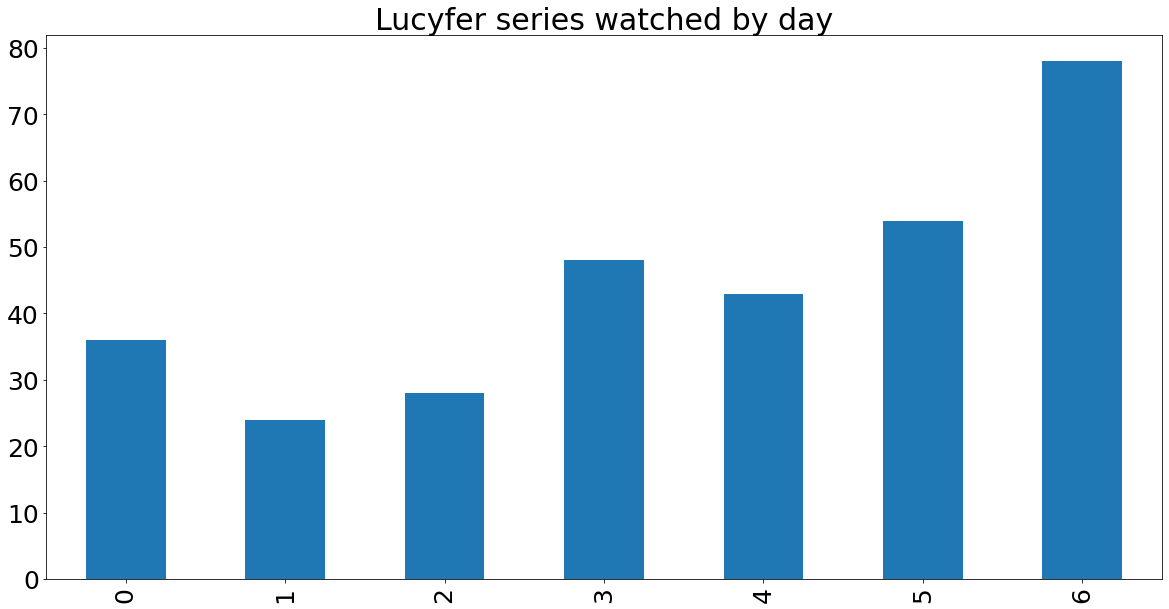

In [43]:
# set categories and define the order where 0 is Monday, Thursday is 1 etc
lucyfer['weekday'] = pd.Categorical(lucyfer['weekday'], categories= [0, 1, 2, 3, 4, 5, 6], ordered=True)

# create lucyfer_by_day and count how many rows are in each day
lucyfer_by_day = lucyfer['weekday'].value_counts()

# sort chronologically days
lucyfer_by_day = lucyfer_by_day.sort_index()


# make font size larger
matplotlib.rcParams.update({'font.size':25})

# plot lucyfer_by_day
lucyfer_by_day.plot(kind='bar',figsize = (20,10), title= 'Lucyfer series watched by day')

<ipython-input-50-0b0bb2f1359b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lucyfer['hour'] = pd.Categorical(lucyfer['hour'],


<AxesSubplot:title={'center':'Lucyfer series watched by hour'}>

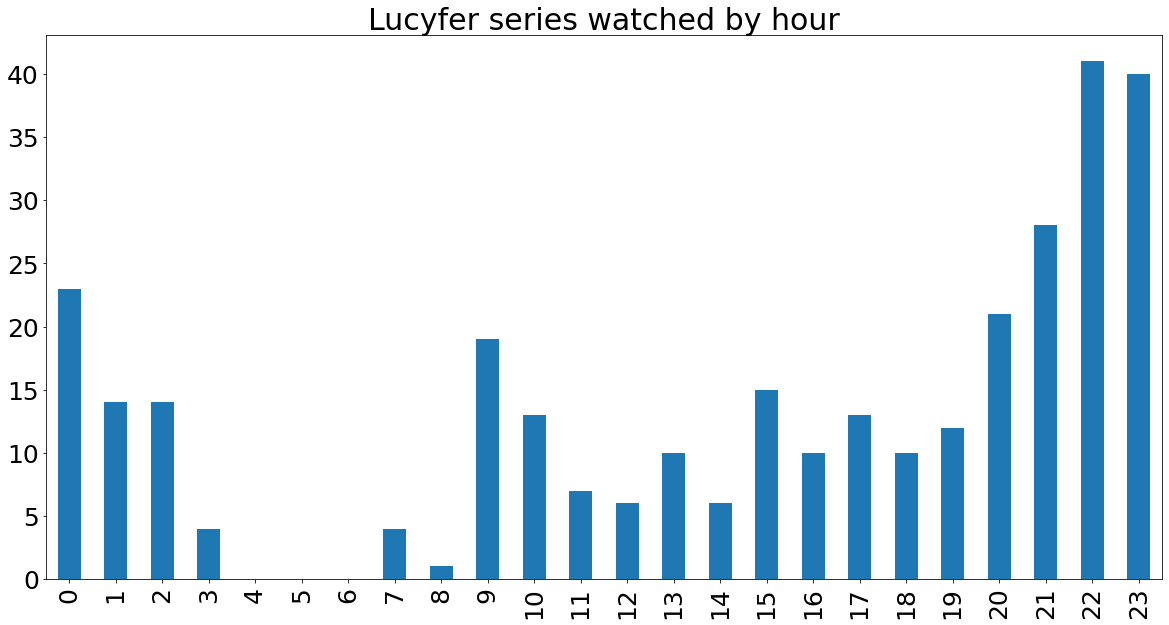

In [50]:
# set categories 0-23 hours
lucyfer['hour'] = pd.Categorical(lucyfer['hour'], 
                                 categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
                                 ordered=True)

# create lucyfer_by_hour and count how many rows are in each hour
lucyfer_by_hour = lucyfer['hour'].value_counts()

# sort chronologically hours
lucyfer_by_hour = lucyfer_by_hour .sort_index()

# make font size larger
matplotlib.rcParams.update({'font.size' : 25})

# lucyfer_by_hour plot
lucyfer_by_hour.plot(kind = 'bar', figsize = (20,10), title = 'Lucyfer series watched by hour')